In [1]:
!ls

RockPaperScissors  sample_data


In [2]:
!git clone https://github.com/akmayer/RockPaperScissors.git

fatal: destination path 'RockPaperScissors' already exists and is not an empty directory.


In [3]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as data
import torchvision
from torchvision import transforms

BATCH_SIZE = 4
TRAIN_DATA_PATH = "./RockPaperScissors/images/train/"
TEST_DATA_PATH = "./RockPaperScissors/images/test/"
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

trainset = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)
trainloader = data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)
testset = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=TRANSFORM_IMG)
testloader  = data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4) 

classes = trainset.classes

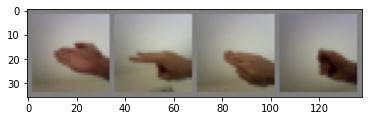

paper scissors paper  rock


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [7]:
'''device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)'''

'device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")\nprint(device)\nnet.to(device)'

In [8]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 104 == 103:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,   104] loss: 0.110
[2,   104] loss: 0.086
[3,   104] loss: 0.059
[4,   104] loss: 0.056
[5,   104] loss: 0.057
[6,   104] loss: 0.053
[7,   104] loss: 0.048
[8,   104] loss: 0.042
[9,   104] loss: 0.038
[10,   104] loss: 0.029
[11,   104] loss: 0.027
[12,   104] loss: 0.018
[13,   104] loss: 0.022
[14,   104] loss: 0.011
[15,   104] loss: 0.006
[16,   104] loss: 0.010
[17,   104] loss: 0.003
[18,   104] loss: 0.002
[19,   104] loss: 0.002
[20,   104] loss: 0.003
Finished Training


In [9]:
PATH = './hands.pth'
torch.save(net.state_dict(), PATH)

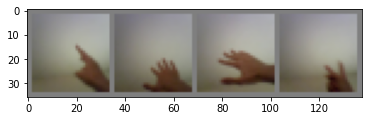

GroundTruth:  scissors paper paper scissors
Predicted:  scissors paper paper scissors


In [17]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 100 %
